In [2]:
import pandas_datareader.data as pdr
import numpy as np
import datetime

tickers = ['SPY', 'XOM', 'GOOG', 'GLD']

spy_df = pdr.get_data_yahoo('SPY', datetime.date.today() - datetime.timedelta(1825), datetime.date.today())
xom_df = pdr.get_data_yahoo('XOM', datetime.date.today() - datetime.timedelta(1825), datetime.date.today())
goog_df = pdr.get_data_yahoo('GOOG', datetime.date.today() - datetime.timedelta(1825), datetime.date.today())
gld_df = pdr.get_data_yahoo('GLD', datetime.date.today() - datetime.timedelta(1825), datetime.date.today())

In [3]:
spy_df.head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-25,211.250000,209.770004,211.100006,209.860001,97107400.0,189.993637
2015-06-26,210.580002,209.160004,210.289993,209.820007,104174800.0,189.957413
2015-06-29,209.830002,205.330002,208.050003,205.419998,202621300.0,185.973969
2015-06-30,207.320007,205.279999,207.259995,205.850006,182925100.0,186.363251
2015-07-01,208.029999,206.559998,207.729996,207.500000,135979900.0,187.857040


In [10]:
spy_df = spy_df[['Adj Close']].rename(columns={'Adj Close': 'SPY'})
xom_df = xom_df[['Adj Close']].rename(columns={'Adj Close': 'XOM'})
goog_df = goog_df[['Adj Close']].rename(columns={'Adj Close': 'GOOG'})
gld_df = gld_df[['Adj Close']].rename(columns={'Adj Close': 'GLD'})

In [13]:
data_df = spy_df.join(xom_df).join(goog_df).join(gld_df)

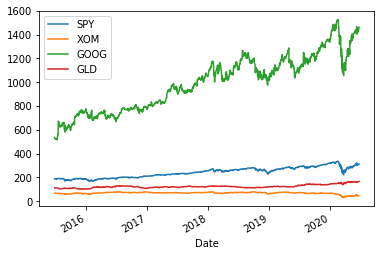

In [14]:
import matplotlib.pyplot as plt
data_df.plot()

In [35]:
# Get data by date range
data_df_small = data_df[(data_df.index > '2019-06-01')]

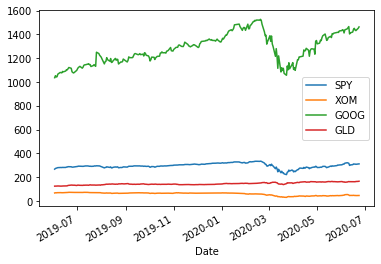

In [36]:
data_df_small.plot()

In [37]:
data_df_small.mean()

SPY      295.502523
XOM       59.654383
GOOG    1276.371399
GLD      145.413656
dtype: float64

In [38]:
data_df_small.median()

SPY      294.020630
XOM       65.738735
GOOG    1264.299988
GLD      142.595001
dtype: float64

In [39]:
data_df_small.std()

SPY      20.308621
XOM      11.695004
GOOG    124.314791
GLD      10.295748
dtype: float64

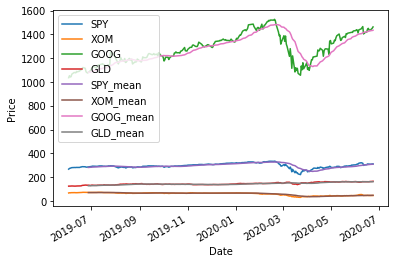

In [69]:
import pandas as pd
# Rolling Statistics
# Bollinger Bands

# Computing rollig statsics

def rolling_mean_spy(df, ax):
    rm = df.rolling(20).mean().rename(columns={'SPY': 'SPY_mean', 'GOOG': 'GOOG_mean', 'GLD': 'GLD_mean', 'XOM': 'XOM_mean', 'SPY': 'SPY_mean'})
    return rm.plot(label='Rolling mean', ax = ax)

ax = data_df_small.plot()
rolling_mean_spy(data_df_small, ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

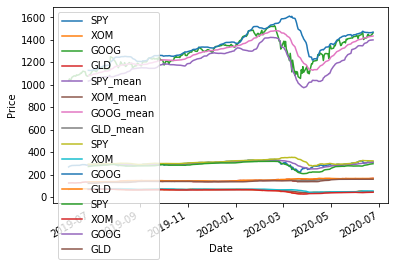

In [77]:
# Computing Bolling band

def get_rolling_mean(value, window):
    return value.rolling(window).mean()

def get_rolling_std(value, window):
    return value.rolling(window).std()

def get_bollinger_bands(rm, rstd):
    upper = rm + 2 * rstd
    lower = rm - 2 * rstd
    return (upper, lower)

rm = get_rolling_mean(data_df_small, 20)
rstd = get_rolling_std(data_df_small, 20)

upper, lower = get_bollinger_bands(rm, rstd)


ax = data_df_small.plot()
rolling_mean_spy(data_df_small, ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
upper.plot(label='upper', ax = ax)
lower.plot(label='lower', ax = ax)

In [93]:
# Daily returns

# Dalit_ret[t] = (price[t]/price[t-1]) - 1
def daily_return(df):
    df_c = df.copy()
    df_c[1:] = df[1:] / df[:-1].values - 1
    df_c.iloc[0, :] = 0
    return df_c

def daily_return2(df):
    df_c = df.copy()
    df_c = df_c / df_c.shift(1) - 1
    return df_c

daily_return(data_df_small)
daily_return(data_df_small)

,SPY,XOM,GOOG,GLD
Date,,,,
2019-06-03,0.000000,0.000000,0.000000,0.000000
2019-06-04,0.021707,0.023790,0.016232,0.000320
2019-06-05,0.008662,-0.008289,-0.010284,0.002557
2019-06-06,0.006503,0.018224,0.002034,0.003268
2019-06-07,0.010007,0.003633,0.020779,0.005640
...,...,...,...,...
2020-06-17,-0.004154,-0.032573,0.005822,0.001911
2020-06-18,0.000385,0.006219,-0.010447,-0.001968
2020-06-19,-0.005715,-0.020034,-0.002953,0.011033


In [ ]:
# Cumulative returns: cum[t] = (price[t]/price[o]) - 1